Question 7
---
The formula for $\mu_{\mu}$ in terms of $I_{\mu}$ and $r_{uk}$ is $$\mu_{\mu}=\frac{\sum_{i\, \in\, I_{u}}^{} r_{ui}}{len(I_{u})}$$

Question 8
---
It means the set of item indices that both user u and v have rated.

Question 9
---
If one user will rate all items highly or poorly, then the absolute rates can not reflect the true rate for the items, and thus the relative rates matter in such case.

Question 10
---

load the data set from the file

In [2]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
import matplotlib.pyplot as plt
import numpy as np

file_path = os.path.expanduser('../ml-latest-small/ratings.csv')
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

The template for knn filter is as follows:

In [3]:
sim_options = {'name': 'pearson'}

def knn_coll_filter(data, sim_options = sim_options, cv = 10, x = range(2, 101, 2)):
    sim_options = sim_options
    avg_rmse = [0] * len(x)
    avg_mae = [0] * len(x)
    for k in x:
        algo = KNNWithMeans(k, sim_options = sim_options)
        a = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = cv)
        test_rmse = a['test_rmse']
        test_mae = a['test_mae']
        avg_rmse[k / 2 - 1] = sum(test_rmse) / len(test_rmse)
        avg_mae[k / 2 - 1] = sum(test_mae) / len(test_mae)
        print k / 2 - 1
        print avg_rmse[k / 2 - 1]
        print avg_mae[k / 2 - 1]
    return x, avg_rmse, avg_mae

So for Question 10, we could just use the data from the *ratings.csv* and pass it into the `knn_coll_filter()`:

In [3]:
x, avg_rmse, avg_mae = knn_coll_filter(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
0
1.0508301943801377
0.8097970462043504
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
10
0.9208935698993678
0.7026747266984961
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
C

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
20
0.9175085125164836
0.699250866953024
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
30
0.9180886379675892
0.6995626961639909
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
C

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
40
0.9179292107376533
0.6997047554619731
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity ma

From the above, we can get the average RMSE, `avg_rmse` and the average MAE, `avg_mae`, and now we can plot using these data

In [3]:
%matplotlib inline

plt.plot(x, avg_rmse, label='RMSE')
plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

NameError: name 'x' is not defined

Question 11
---
Thus we can conclude from the plots that **the minimum k is 22**

Question 12
---

The templete for filtering the trimmed data

In [4]:
from surprise.model_selection import KFold
from surprise import accuracy

x = range(2, 101, 2)

# the trim function is used to process the testset
# by default the trim function don't do anything
def knn_filter_trim(trim = lambda x : x):
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    rmse_list = []
    for k in x:
        rmse = 0
        algo = KNNWithMeans(k, sim_options = sim_options)
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset = trim(testset)
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / n_splits)
    return rmse_list

Using the template above, for Question 12-14 we could just write their corresponding *trim function* and use this to process the testset.

In [5]:
# the trim function for popular movie trimming
# delete the movie which has received less than or equal to 2 ratings
# each item in testset is represented by (userId, movieId, rating)
# this trim function can be used by Question 12 and 13
def trim(testset, trim_condition = lambda x : x <= 2):
    movie_map = dict()
    for i in testset:
        movie = i[1]
        movie_map[movie] = 1 if (movie not in movie_map) else movie_map[movie] + 1
    for movie_id in movie_map:
        # meaning that this item should be trimmed
        if trim_condition(movie_map[movie_id]):
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset

In [6]:
def trim_popular(testset):
    return trim(testset)
rmse_popular_list = knn_filter_trim(trim_popular)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0634
Computing the pearson similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 

And we can use the `rmse_popular_list` to evaluate the performance on the trimmed popular movie set.

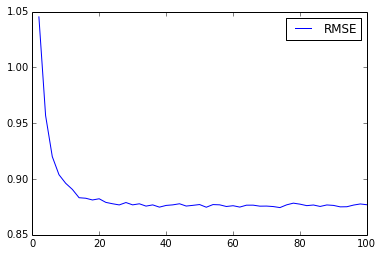

In [39]:
plt.plot(x, rmse_popular_list, label='RMSE')
plt.legend()
plt.show()

NameError: name 'rmse_popular_list' is not defined

Question 13
---
The difference between Question 12 and Question 13 is just the parameter `trim_condition` in the `trim()`

In [35]:
def trim_unpopular(testset):
    return trim(testset, trim_condition = lambda x : x > 2)

rmse_unpopular_list = knn_filter_trim(trim_unpopular)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0816
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0573
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0831
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0548
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0876
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0839
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0596
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0308
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0810
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0010
Computing 

Done computing similarity matrix.
RMSE: 0.9800
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9903
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0019
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0073
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0275
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0133
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0068
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9929
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0140
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0046
Computing the pearson similarity matrix...
Done compu

Done computing similarity matrix.
RMSE: 0.9655
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9892
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0250
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0167
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9891
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0100
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0131
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9890
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0218
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0038
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9986
Computing the pearson similarity matrix...
Done compu

RMSE: 1.0204
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0333
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0042
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9839
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0113
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9871
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0224
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9978
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0021
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9834
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0084
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.01

Done computing similarity matrix.
RMSE: 1.0184
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0238
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9920
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0063
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0128
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0044
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9781
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0237
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9763
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0075
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0118
Computing the pearson similarity matrix...
Done compu

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0184
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9873
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0409
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0223
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9924
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0100
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9999
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9991
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0294
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9994
Computing 

And we can use the `rmse_unpopular_list` to evaluate the performance on the trimmed unpopular movie set.

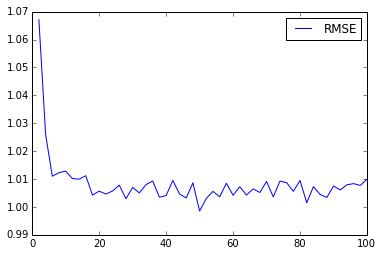

In [38]:
plt.plot(x, rmse_unpopular_list, label='RMSE')
plt.legend()
plt.show()

Question 14
---

In [17]:
def trim_high_variance(testset):
    movie_map = dict()
    for (user, movie, rate, _) in testset:
        if (movie in movie_map):
            movie_map[movie].append(rate)
        else:
            movie_map[movie] = [rate]
    for movie_id in movie_map:
        rating = movie_map[movie_id]
        if len(rating) < 5 or np.var(np.array(rating)) < 2:
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset 

And the trimming for the high variance movie trimmed test set can be implemented by the above method.

In [9]:
rmse_high_variance_list = knn_filter_trim(trim_high_variance)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5572
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6242
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6247
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4518
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5412
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6435
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5893
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4555
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4553
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6662
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3950
Computing 

Done computing similarity matrix.
RMSE: 1.5007
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4023
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3269
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5534
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4202
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3374
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4029
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4452
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3947
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4846
Computing the pearson similarity matrix...
Done compu

Done computing similarity matrix.
RMSE: 1.5270
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4440
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3325
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3631
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3703
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5086
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3685
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3683
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6056
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3989
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4209
Computing the pearson similarity matrix...
Done compu

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3626
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5580
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5339
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4671
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5292
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5039
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4220
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4393
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4624
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4235
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4561
Computing 

Done computing similarity matrix.
RMSE: 1.4081
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4128
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5241
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3262
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3673
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3916
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5486
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4272
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4267
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4491
Computing the pearson similarity matrix...
Done compu

RMSE: 1.4446
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4514
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4250
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4124
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5173
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4009
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4697
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4621
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5096
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5198
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.33

The plot of the rmse_unpopular_list is as follows:

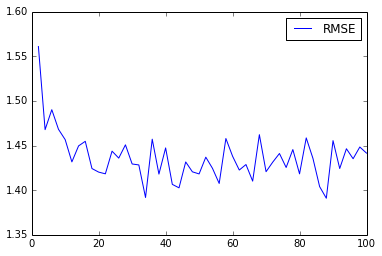

In [10]:
%matplotlib inline

plt.plot(x, rmse_high_variance_list, label='RMSE')
plt.legend()
plt.show()

Question 15
---

Computing the pearson similarity matrix...
Done computing similarity matrix.


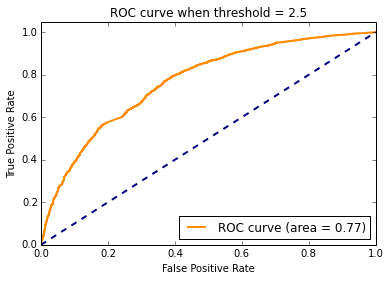

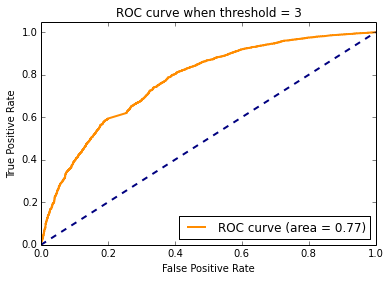

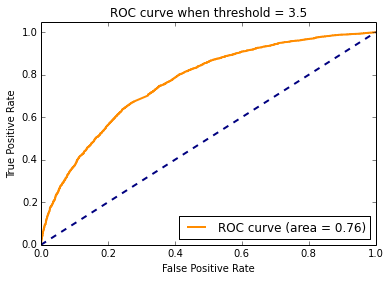

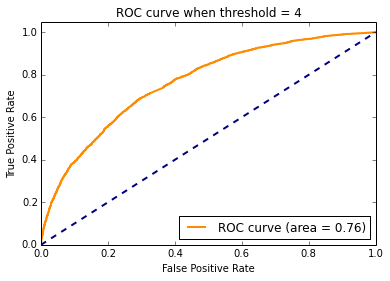

In [76]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

thresholds = [2.5, 3, 3.5, 4]
k = 22
sim_options = {'name': 'pearson'}

trainset, testset = train_test_split(data, test_size = 0.1)
algo = KNNWithMeans(k, sim_options = sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

label_true = [x[2] for x in predictions]
label_esti = [x[3] for x in predictions]

for threshold in thresholds:
    binary_true = map(lambda x : 0 if x < threshold else 1, label_true)
    fpr, tpr, _ = roc_curve(binary_true, label_esti)
    roc_auc = auc(fpr,tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve when threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()